In [2]:
# Importações
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [3]:
# Leitura da base de dados
df = pd.read_csv("creditcard.csv")

print(df.shape)



(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Class
0    284315
1       492
Name: count, dtype: int64
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


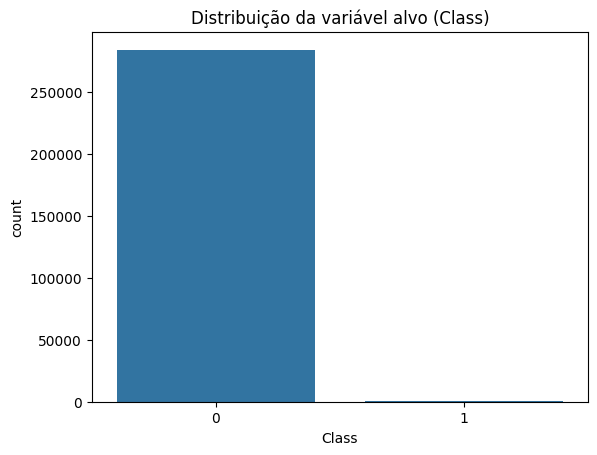

In [4]:
# Primeiras linhas
display(df.head())

# Informações gerais
df.info()

# Estatísticas descritivas
display(df.describe())

# Distribuição da variável alvo
print(df["Class"].value_counts())
print(df["Class"].value_counts(normalize=True))
sns.countplot(x="Class", data=df)
plt.title("Distribuição da variável alvo (Class)")
plt.show()


In [5]:
# Verificação de valores ausentes
print(df.isnull().sum())

num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
# Número de linhas duplicadas exatas
print("Duplicadas antes:", df.duplicated().sum())

# Remoção de duplicadas
df = df.drop_duplicates()
print("Duplicadas depois:", df.duplicated().sum())

print(df["Class"].value_counts())


Duplicadas antes: 1081
Duplicadas depois: 0
Class
0    283253
1       473
Name: count, dtype: int64


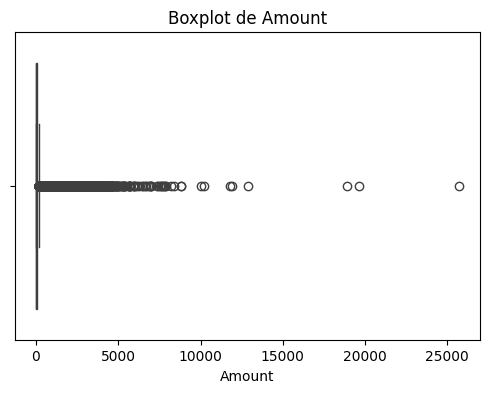

Limites Amount: -102.26500000000001 185.375
Qtd outliers Amount: 31685


In [7]:
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Amount"])
plt.title("Boxplot de Amount")
plt.show()

lower_amt, upper_amt = detect_outliers_iqr(df, "Amount")
print("Limites Amount:", lower_amt, upper_amt)
print("Qtd outliers Amount:", ((df["Amount"] < lower_amt) | (df["Amount"] > upper_amt)).sum())

df["Amount_capped"] = df["Amount"].clip(lower=lower_amt, upper=upper_amt)


In [8]:
mm_scaler = MinMaxScaler()
df["Amount_minmax"] = mm_scaler.fit_transform(df[["Amount_capped"]])


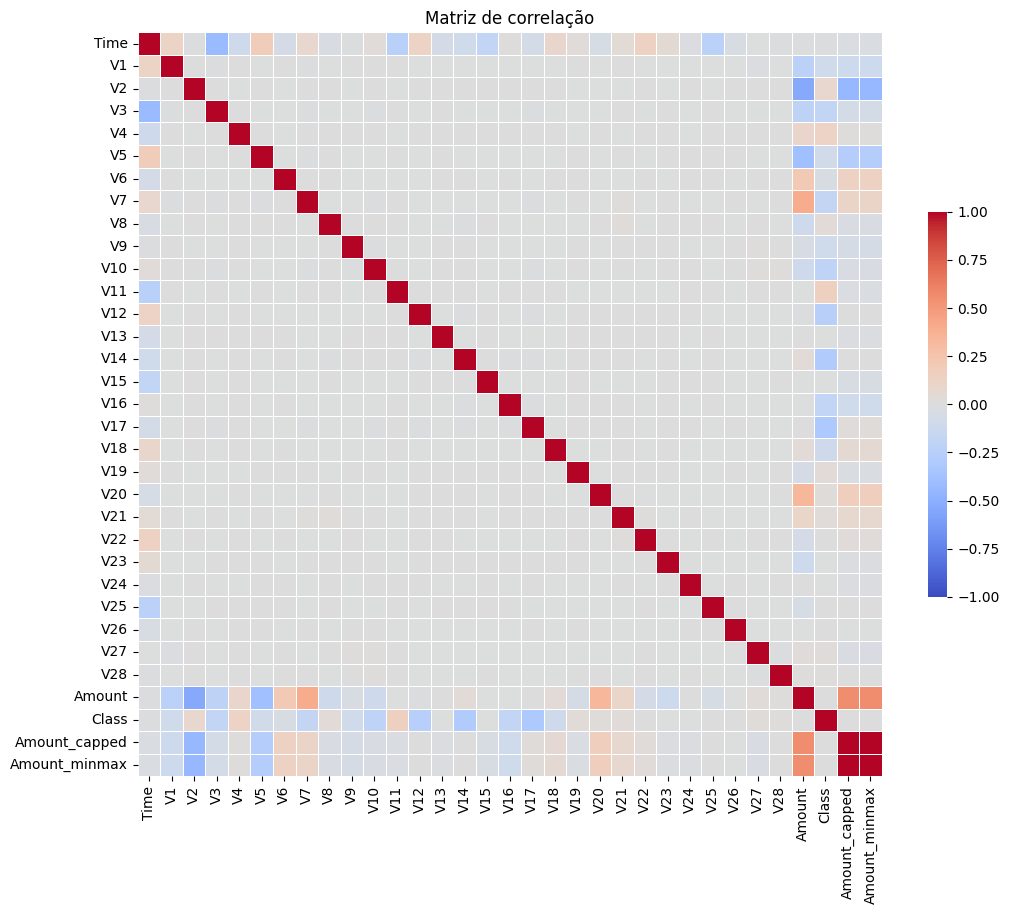

Class            1.000000
V11              0.149067
V4               0.129326
V2               0.084624
V19              0.033631
V8               0.033068
V21              0.026357
V27              0.021892
V20              0.021486
V28              0.009682
Amount           0.005777
V22              0.004887
Amount_capped    0.004664
Amount_minmax    0.004664
V26              0.004265
V25              0.003202
V15             -0.003300
V13             -0.003897
V23             -0.006333
V24             -0.007210
Time            -0.012359
V6              -0.043915
V5              -0.087812
V9              -0.094021
V1              -0.094486
V18             -0.105340
V7              -0.172347
V3              -0.182322
V16             -0.187186
V10             -0.206971
V12             -0.250711
V14             -0.293375
V17             -0.313498
Name: Class, dtype: float64


In [9]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    vmax=1.0,
    vmin=-1.0,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)
plt.title("Matriz de correlação")
plt.show()

corr_with_class = corr_matrix["Class"].sort_values(ascending=False)
print(corr_with_class)


In [10]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=["object", "category"]).columns
print("Colunas categóricas:", cat_cols)

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


Colunas categóricas: Index([], dtype='object')


In [11]:
X = df.drop(columns=["Class"])
y = df["Class"]

print("Distribuição original:")
print(y.value_counts())
print(y.value_counts(normalize=True))


Distribuição original:
Class
0    283253
1       473
Name: count, dtype: int64
Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,          
    random_state=42,
    stratify=y             
)

print("Treino:", y_train.value_counts())
print("Teste:", y_test.value_counts())

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Após SMOTE (treino):")
print(y_train_res.value_counts())
print(y_train_res.value_counts(normalize=True))


Treino: Class
0    226602
1       378
Name: count, dtype: int64
Teste: Class
0    56651
1       95
Name: count, dtype: int64
Após SMOTE (treino):
Class
0    226602
1    226602
Name: count, dtype: int64
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


**Algoritmos de agrupamento**

In [13]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=["Class"])

scaler_cluster = StandardScaler()
X_scaled = scaler_cluster.fit_transform(X)


In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

def avaliar_clusters(X, labels, nome_modelo, sample_size=10000, random_state=42):
    # labels como array numpy
    labels = np.array(labels)

    # Número de clusters reais (ignorando rótulo -1 como ruído)
    unique_labels = set(labels)
    n_clusters = len(unique_labels - {-1})
    
    print(f"\n=== {nome_modelo} ===")
    print(f"Número de clusters encontrados: {n_clusters}")
    
    if n_clusters < 2:
        print("Não é possível calcular métricas: menos de 2 clusters distintos.")
        return
    
    X_used = X
    labels_used = labels
    if (sample_size is not None) and (X.shape[0] > sample_size):
        rng = np.random.RandomState(random_state)
        idx = rng.choice(X.shape[0], size=sample_size, replace=False)
        X_used = X[idx]
        labels_used = labels[idx]
        print(f"Usando amostra de {sample_size} pontos para o cálculo das métricas.")
    
    try:
        sil = silhouette_score(X_used, labels_used)
        db = davies_bouldin_score(X_used, labels_used)
        ch = calinski_harabasz_score(X_used, labels_used)
        print(f"Silhouette Score: {sil:.4f}")
        print(f"Davies-Bouldin Index: {db:.4f}")
        print(f"Calinski-Harabasz Index: {ch:.4f}")
    except ValueError as e:
        print("Erro ao calcular métricas:", e)


In [15]:
from sklearn.cluster import KMeans

# K-Means com K=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

avaliar_clusters(X_scaled, kmeans_labels, "K-Means (k=2)")


=== K-Means (k=2) ===
Número de clusters encontrados: 2
Usando amostra de 10000 pontos para o cálculo das métricas.
Silhouette Score: 0.1783
Davies-Bouldin Index: 2.7363
Calinski-Harabasz Index: 714.4066


In [16]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.0, min_samples=10, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(X_scaled)

avaliar_clusters(X_scaled, dbscan_labels, "DBSCAN (eps=2.0, min_samples=10)")



=== DBSCAN (eps=2.0, min_samples=10) ===
Número de clusters encontrados: 304
Usando amostra de 10000 pontos para o cálculo das métricas.
Silhouette Score: -0.1791
Davies-Bouldin Index: 1.6322
Calinski-Harabasz Index: 11.3818


In [17]:
from minisom import MiniSom

som_x, som_y = 10, 10
input_len = X_scaled.shape[1]

som = MiniSom(
    x=som_x,
    y=som_y,
    input_len=input_len,
    sigma=1.0,
    learning_rate=0.5,
    neighborhood_function='gaussian',
    random_seed=42
)

som.random_weights_init(X_scaled)
som.train_random(X_scaled, num_iteration=1000)

som_coords = np.array([som.winner(x) for x in X_scaled])

som_features = np.column_stack((som_coords[:, 0], som_coords[:, 1]))

kmeans_som = KMeans(n_clusters=2, random_state=42, n_init=10)
som_labels = kmeans_som.fit_predict(som_features)

avaliar_clusters(som_features, som_labels, "SOM + K-Means (2 clusters)")




=== SOM + K-Means (2 clusters) ===
Número de clusters encontrados: 2
Usando amostra de 10000 pontos para o cálculo das métricas.
Silhouette Score: 0.3921
Davies-Bouldin Index: 1.1019
Calinski-Harabasz Index: 6702.5692
